In [1]:
#Sentiment Analysis on Customer Feedback

In [2]:
#Polarity is a float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].

In [3]:
#textblob must be installed, check https://textblob.readthedocs.io/en/dev/ for detailed instructions
import pandas as pd
from textblob import TextBlob

In [4]:
# The assumption is that you have copied the User Feedback.csv file to the same folder as this Python script.
# Then you can read in the file to a pandas dataframe really easily with just this one line of code. 
feedbackdata = pd.read_csv('User Feedback.csv', quotechar='"')

In [5]:
#Print out part of the csv file just to confirm we have it and we understand the data
feedbackdata.head()

,Date,Comments
0,"July 5, 2019",What a great product! I love the simplicity an...
1,"July 6, 2019",How can you release this? This is terrible? I ...
2,"July 7, 2019",This product is nice.
3,"July 8, 2019",I keep getting errors. Nothing is working. Ple...
4,"July 9, 2019",I still can't get anything to run. Everything ...


In [6]:
for comment in range(0,len(feedbackdata)):
    currentComment = feedbackdata['Comments'].iloc[comment]
    print(currentComment)
    print("Polarity: ", TextBlob(str(currentComment)).sentiment[0])
    print("Subjectivity: ", TextBlob(str(currentComment)).sentiment[1])

What a great product! I love the simplicity and beauty!
Polarity:  0.8125
Subjectivity:  0.675
How can you release this? This is terrible? I want my money back!
Polarity:  -0.5
Subjectivity:  0.5
This product is nice.
Polarity:  0.6
Subjectivity:  1.0
I keep getting errors. Nothing is working. Please fix asap!
Polarity:  0.0
Subjectivity:  0.0
I still can't get anything to run. Everything is broken.
Polarity:  -0.4
Subjectivity:  0.4
New features are nice. I really like the new editing options for my posts. Will we be able to add images too?
Polarity:  0.3145454545454546
Subjectivity:  0.5468181818181818


In [7]:
# Create a new file "User Feedback with Sentiment Analysis.csv"
# which will contain a copy of the date and comments from the original file
# and will add the polarity and subjectivity values for each comment

print(feedbackdata['Comments'].iloc[0])
print(TextBlob(str(feedbackdata['Comments'].iloc[0])).sentiment)

What a great product! I love the simplicity and beauty!
Sentiment(polarity=0.8125, subjectivity=0.675)


In [8]:
f = open("User Feedback with Sentiment Analysis.csv", "w")
f.writelines("Date" + "," + "Comment" + "," + "Polarity" + "," + "Subjectivity" + "\n")
for comment in range(0, len(feedbackdata)):
    date = feedbackdata['Date'].iloc[comment]
    currentComment = feedbackdata['Comments'].iloc[comment]
    polarity = TextBlob(str(currentComment)).sentiment[0]
    subjectivity = TextBlob(str(currentComment)).sentiment[1]
    f.writelines("\"" + date + "\"" + "," + currentComment + "," + str(polarity) + "," + str(subjectivity) + "\n")
f.close()

## How do we visualize this data? 

In [9]:
#Matplotlib is a charting engine for Python
import matplotlib.pyplot as plt

In [10]:
#Open the file 
analysisdata = pd.read_csv('User Feedback with Sentiment Analysis.csv', quotechar='"')

In [11]:
#View the data so we can make sure we understand it.
analysisdata.head()

,Date,Comment,Polarity,Subjectivity
0,"July 5, 2019",What a great product! I love the simplicity an...,0.8125,0.675
1,"July 6, 2019",How can you release this? This is terrible? I ...,-0.5000,0.500
2,"July 7, 2019",This product is nice.,0.6000,1.000
3,"July 8, 2019",I keep getting errors. Nothing is working. Ple...,0.0000,0.000
4,"July 9, 2019",I still can't get anything to run. Everything ...,-0.4000,0.400


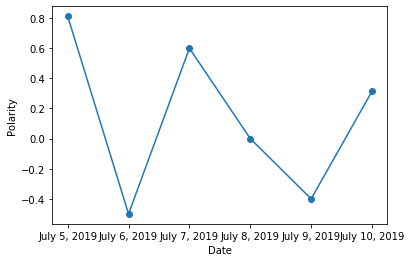

In [12]:
# Chart the data. 
plt.plot(analysisdata['Date'],analysisdata['Polarity'], marker='o')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.show()